In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [77]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('stocks_data.csv')

# Kiểm tra và in ra các giá trị thiếu
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())



Giá trị thiếu trong dữ liệu:
id          0
datetime    0
open        0
high        0
low         0
close       0
volume      0
code        0
dtype: int64


In [78]:
df = df[df['code'] == 'AAPL']
print(df)




        id    datetime       open       high        low      close     volume  \
2     1000  2020-11-19  117.59000  119.06000  116.81000  118.64000   74113000   
3      999  2020-11-20  118.64000  118.77000  117.29000  117.34000   73604300   
10     998  2020-11-23  117.18000  117.62000  113.75000  113.85000  127959300   
13     997  2020-11-24  113.91000  115.85000  112.59000  115.17000  113874200   
20     996  2020-11-25  115.55000  116.75000  115.17000  116.03000   76499200   
...    ...         ...        ...        ...        ...        ...        ...   
4975     5  2024-11-04  220.99001  222.78999  219.71001  222.00999   44944500   
4981     4  2024-11-05  221.80000  223.95000  221.14000  223.45000   28111300   
4985     3  2024-11-06  222.61000  226.07001  221.19000  222.72000   54561100   
4991     2  2024-11-07  224.63000  227.88000  224.57001  227.48000   42137700   
4995     1  2024-11-08  227.17000  228.66000  226.41000  226.96001   38308700   

      code  
2     AAPL  
3

In [79]:
# Chuyển đổi cột 'date_time_local' thành định dạng datetime và xử lý các giá trị không hợp lệ

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Loại bỏ các dòng có giá trị NaT trong cột 'date_time_local' và điền giá trị thiếu cho 'temperature'

# Chuyển đổi dữ liệu theo dạng ngày và tính nhiệt độ trung bình trong ngày
daily_data = df[['datetime', 'volume']].set_index('datetime')


# Chuẩn bị dữ liệu phân cụm: Sử dụng nhiệt độ cho phân cụm
df_cluster = daily_data[['volume']].copy() # Chỉ dùng cột 'temperature' cho KMeans

In [80]:
print(df_cluster.shape)

(1000, 1)


In [81]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[['volume']])  # Chỉ chuẩn hóa cột nhiệt độ

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=6, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Kết hợp lại cột 'half_year' từ daily_data cho việc điều chỉnh nhãn cụm



In [82]:
print(df_cluster['cluster'].shape)

(1000,)


In [83]:
scatter_data = []
# Vẽ biểu đồ phân cụm theo nhiệt độ hàng ngày


Cluster 0 has 301 rows
Cluster 1 has 115 rows
Cluster 2 has 220 rows
Cluster 3 has 45 rows
Cluster 4 has 2 rows
Cluster 5 has 317 rows


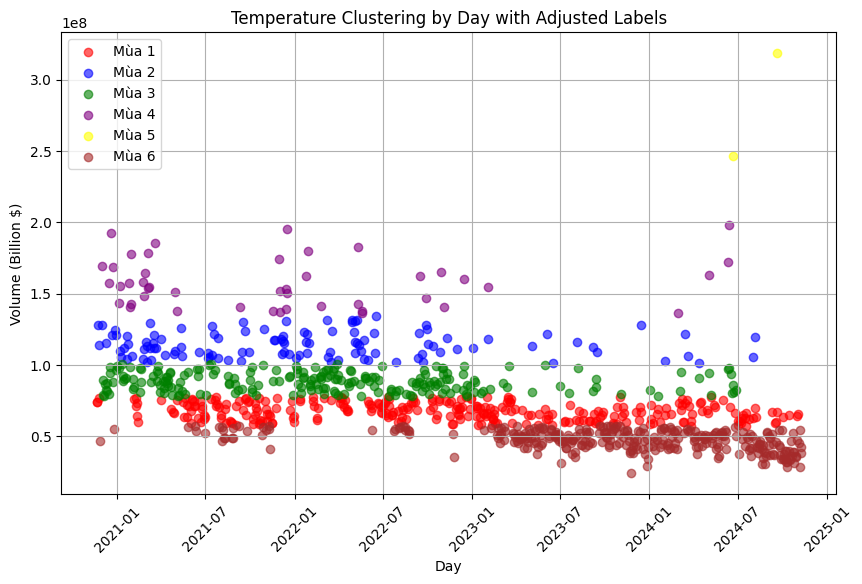

In [84]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple','yellow', 'brown']
for i in range(6):
    subset = df_cluster[df_cluster['cluster'] == i]
    print(f"Cluster {i} has {len(subset)} rows")
    for index, row in subset.iterrows():
        scatter_data.append({
            "index": index,
            "volume": row['volume'],
            "season": i
        })
    plt.scatter(subset.index, subset['volume'], color=colors[i], label=f'Mùa {i+1}', alpha=0.6)
# Lưu scatter_data vào file CSV
scatter_df = pd.DataFrame(scatter_data)
# scatter_df.to_csv('scatter_data.csv', index=False)
plt.title('Temperature Clustering by Day with Adjusted Labels')
plt.xlabel('Day')
plt.ylabel('Volume (Billion $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



In [85]:
# scatter_df.to_csv('scatter_data_trend.csv', index=False)

In [86]:
print(scatter_df.shape)

(1000, 3)


In [87]:
df = pd.read_csv('scatter_data_trend.csv')
    
# Chuyển đổi cột 'index' thành định dạng chuỗi để JSON hóa
df['index'] = pd.to_datetime(df['index']).dt.strftime('%Y-%m-%d')
df['year'] = pd.to_datetime(df['index']).dt.year  # Đảm bảo cột 'year' được tạo đúng
df['season'] = df['season'].map({0: 'Low', 1: 'High', 2: 'Average',3:'Spike', 4:'Ultra_High', 5:'VeryLow'})

# Tính số ngày trong từng mùa cho mỗi năm
season_counts = df.groupby(['year', 'season']).size().unstack(fill_value=0)
# Chuyển đổi dữ liệu thành JSON
season_counts = season_counts.reset_index()
season_counts = season_counts.to_dict(orient='records')


In [88]:
print(season_counts)

[{'year': 2020, 'Average': 13, 'High': 7, 'Low': 3, 'Spike': 4, 'Ultra_High': 0, 'VeryLow': 2}, {'year': 2021, 'Average': 74, 'High': 52, 'Low': 81, 'Spike': 24, 'Ultra_High': 0, 'VeryLow': 21}, {'year': 2022, 'Average': 101, 'High': 41, 'Low': 84, 'Spike': 12, 'Ultra_High': 0, 'VeryLow': 13}, {'year': 2023, 'Average': 18, 'High': 9, 'Low': 79, 'Spike': 1, 'Ultra_High': 0, 'VeryLow': 143}, {'year': 2024, 'Average': 14, 'High': 6, 'Low': 54, 'Spike': 4, 'Ultra_High': 2, 'VeryLow': 138}]


In [89]:
# Vẽ xu hướng nhiệt độ theo ngày
plt.figure(figsize=(10, 6))
plt.plot(df_cluster.index, df_cluster['temperature'], marker='o', color='b', label='Daily Temperature')
plt.title('Daily Temperature Trends')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


KeyError: 'temperature'

<Figure size 1000x600 with 0 Axes>